In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
class Env:

    def __init__(self,xmax, ymax):
        self.done=False
        self.state=(0,0)
        self.ymax=ymax
        self.xmax=xmax

    def reset(self):
        self.state=(0,0)
        self.done=False
        return self.state,0,self.done

    def step(self,action):
        y,x=self.state
        if action==0: # up
            y=y+1
        elif action==1: # right
            x=x+1
        elif action==2: # down
            y=y-1
        else: # left
            x=x-1
        
        if x<0:
            x+=1
            r=-1
        elif x>self.xmax:
            x-=1
            r=-1            
        elif y>self.ymax:
            y-=1
            r=-1
        elif x==self.xmax and y==0:
            self.done=True
            r=0
        elif y==0 and x>0 and x<self.xmax:
            self.done=True
            r=-100
            y,x=(0,0)
        elif y<0:
            y+=1
            r=-1
        else:
            r=-1
        self.state=(y,x)
        return self.state,r,self.done
        



In [5]:
xmax=11
ymax=3
e=Env(xmax,ymax)

# SARSA

In [6]:
alpha=.5
epsilon=0.1
q=np.zeros(shape=(ymax+1,xmax+1,4))
total_rewards=[]
for k in tqdm(range(500)):
    t=0
    (y,x),r,d=e.reset()
    t+=r
    if np.random.uniform()<epsilon:
        a=np.random.choice([0,1,2,3])
    else:
        a=np.argmax(q[y][x])
    while not d:
        (yp,xp),r,d=e.step(a)
        t+=r
        if np.random.uniform()<epsilon:
            ap=np.random.choice([0,1,2,3])
        else:
            ap=np.argmax(q[yp][xp])
        q[y][x][a] =q[y][x][a]+ alpha*(r+q[yp][xp][ap]-q[y][x][a])
        (y,x)=(yp,xp)
        a=ap
    total_rewards.append(t)


        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3054.18it/s]


In [7]:
np.argmax(q,2)[::-1]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2],
       [0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2],
       [0, 0, 1, 3, 1, 0, 0, 3, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

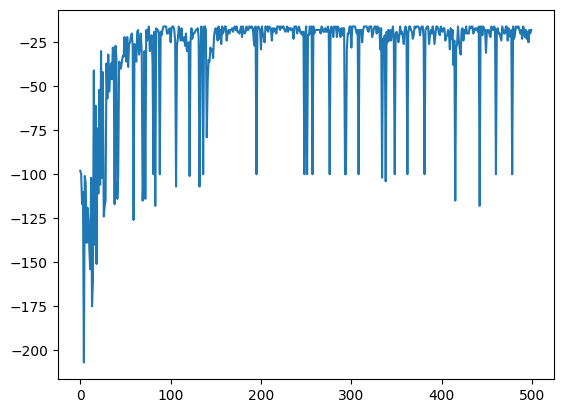

In [8]:
plt.plot(total_rewards)

In [9]:
total_rewards[-10:]

[-16, -17, -22, -18, -23, -19, -25, -18, -20, -18]

# Q- Learning

In [10]:
alpha=.5
epsilon=0.1
q=np.zeros(shape=(ymax+1,xmax+1,4))
total_rewards=[]
for k in tqdm(range(500)):
    t=0
    (y,x),r,d=e.reset()
    t+=r
    while not d:
        if np.random.uniform()<epsilon:
            a=np.random.choice([0,1,2,3])
        else:
            a=np.argmax(q[y][x])
        (yp,xp),r,d=e.step(a)
        t+=r
        ap=np.argmax(q[yp][xp])
        q[y][x][a] =q[y][x][a]+ alpha*(r+q[yp][xp][ap]-q[y][x][a])
        (y,x)=(yp,xp)
    total_rewards.append(t)


        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 4172.37it/s]


In [11]:
np.argmax(q,2)[::-1]

array([[3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2],
       [0, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

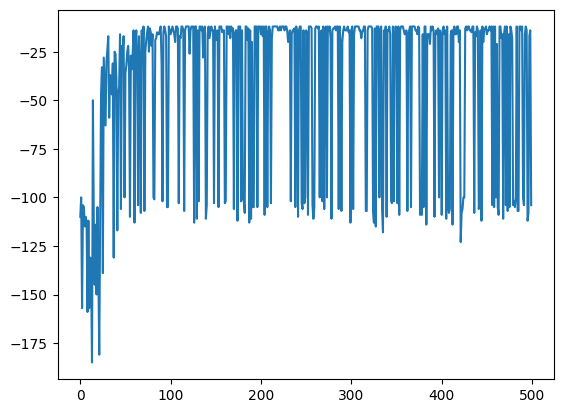

In [12]:
plt.plot(total_rewards)

In [13]:
total_rewards[-10:]

[-100, -104, -16, -12, -14, -112, -108, -17, -14, -104]